In [27]:
import pandas as pd
import numpy as np
import os
import sys
import matplotlib.pyplot as plt
import seaborn as sns

In [1]:
import pandas as pd

df = pd.read_csv("sales_train.csv")
df

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0
...,...,...,...,...,...,...
2935844,10.10.2015,33,25,7409,299.00,1.0
2935845,09.10.2015,33,25,7460,299.00,1.0
2935846,14.10.2015,33,25,7459,349.00,1.0
2935847,22.10.2015,33,25,7440,299.00,1.0


In [2]:
df.columns

Index(['date', 'date_block_num', 'shop_id', 'item_id', 'item_price',
       'item_cnt_day'],
      dtype='object')

In [5]:
df.shop_id.unique()

array([59, 25, 24, 23, 19, 22, 18, 21, 28, 27, 29, 26,  4,  6,  2,  3,  7,
        0,  1, 16, 15,  8, 10, 14, 13, 12, 53, 31, 30, 32, 35, 56, 54, 47,
       50, 42, 43, 52, 51, 41, 38, 44, 37, 46, 45,  5, 57, 58, 55, 17,  9,
       49, 39, 40, 48, 34, 33, 20, 11, 36])

In [8]:
null_values = df.isnull().sum()
negative_values = (df[['item_price', 'item_cnt_day']] < 0).sum()
print(null_values)


date              0
date_block_num    0
shop_id           0
item_id           0
item_price        0
item_cnt_day      0
dtype: int64


In [ ]:
print(negative_values)

item_price         1
item_cnt_day    7356
dtype: int64


In [10]:
df[df['item_price'] < 0]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
484683,15.05.2013,4,32,2973,-1.0,1.0


In [11]:
df[df['item_cnt_day'] < 0]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
2,05.01.2013,0,25,2552,899.0,-1.0
148,23.01.2013,0,25,2321,999.0,-1.0
175,07.01.2013,0,25,2199,1449.0,-1.0
807,02.01.2013,0,25,2330,599.0,-1.0
1041,13.01.2013,0,25,5034,1989.0,-1.0
...,...,...,...,...,...,...
2934243,26.10.2015,33,25,3917,449.0,-1.0
2934462,18.10.2015,33,25,4896,6398.0,-1.0
2935263,05.10.2015,33,25,10039,249.0,-1.0
2935643,16.10.2015,33,25,7893,2990.0,-1.0


In [15]:
df.shape

(2935849, 6)

In [18]:
df['date'] = pd.to_datetime(df['date'], format='%d.%m.%Y')

In [19]:
df = df[df['item_price'] < 100000]
df = df[df['item_cnt_day'] < 1001]

In [20]:
df.shape

(2935847, 6)

In [22]:
train = df
train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,2013-01-02,0,59,22154,999.00,1.0
1,2013-01-03,0,25,2552,899.00,1.0
2,2013-01-05,0,25,2552,899.00,-1.0
3,2013-01-06,0,25,2554,1709.05,1.0
4,2013-01-15,0,25,2555,1099.00,1.0


In [23]:
train['value'] = train['item_price'] * train['item_cnt_day']
train

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,value
0,2013-01-02,0,59,22154,999.00,1.0,999.00
1,2013-01-03,0,25,2552,899.00,1.0,899.00
2,2013-01-05,0,25,2552,899.00,-1.0,-899.00
3,2013-01-06,0,25,2554,1709.05,1.0,1709.05
4,2013-01-15,0,25,2555,1099.00,1.0,1099.00
...,...,...,...,...,...,...,...
2935844,2015-10-10,33,25,7409,299.00,1.0,299.00
2935845,2015-10-09,33,25,7460,299.00,1.0,299.00
2935846,2015-10-14,33,25,7459,349.00,1.0,349.00
2935847,2015-10-22,33,25,7440,299.00,1.0,299.00


<Axes: xlabel='date_block_num'>

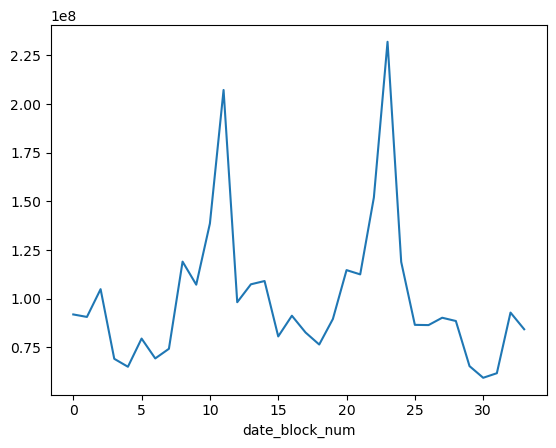

In [28]:
train.groupby('date_block_num')['value'].sum().plot()

In [29]:
train

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,value
0,2013-01-02,0,59,22154,999.00,1.0,999.00
1,2013-01-03,0,25,2552,899.00,1.0,899.00
2,2013-01-05,0,25,2552,899.00,-1.0,-899.00
3,2013-01-06,0,25,2554,1709.05,1.0,1709.05
4,2013-01-15,0,25,2555,1099.00,1.0,1099.00
...,...,...,...,...,...,...,...
2935844,2015-10-10,33,25,7409,299.00,1.0,299.00
2935845,2015-10-09,33,25,7460,299.00,1.0,299.00
2935846,2015-10-14,33,25,7459,349.00,1.0,349.00
2935847,2015-10-22,33,25,7440,299.00,1.0,299.00


In [37]:
grouped_item_count = train.groupby('date_block_num')['item_cnt_day'].sum()
grouped_item_count

date_block_num
0     131479.0
1     128090.0
2     147142.0
3     107190.0
4     106970.0
5     125381.0
6     116966.0
7     125291.0
8     133332.0
9     127541.0
10    130009.0
11    183341.0
12    116899.0
13    109687.0
14    115297.0
15     96556.0
16     97790.0
17     97429.0
18     91280.0
19    102721.0
20     99208.0
21    107422.0
22    117845.0
23    168755.0
24    110971.0
25     84198.0
26     82014.0
27     77827.0
28     72295.0
29     64114.0
30     63187.0
31     66079.0
32     72843.0
33     68887.0
Name: item_cnt_day, dtype: float64